(advection:exercises)=
### Advection diffusion equation

**Task 4**: Solve the Advection-Diffusion equation, with the following initial and boundary conditions: at t=0 , 𝑐$_0$=0; for all subsequent times, 𝑐=0 at x=0, 𝑐=1 at 𝑥=𝐿=1, 𝑢=1.0 and K=0.1. Integrate over 0.05 s with a Δ𝑡=0.0028. Plot the results and the dimensionless time scales. Increase gradually Δ𝑡 and analyse the results. Once you understand what is happening, set again Δ𝑡=0.0028 and gradually increase the wind speed. Discuss the results.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline


def advection_diffusion(u, K, integration, dt, Nx):
    """ Simple advection-diffusion equation.
    
    integration :: Integration time in seconds
    Nx          :: Number of grid points
    dt          :: time step in seconds
    K           :: turbulent diffusivity
    u           :: Speed of fluid
    """
    
    # Definitions and assignments
    a   = 0.                # Left border
    b   = 1.                # Right border
    dx  = (b-a)/Nx          # Distance between grid points

    # Define the boundary conditions
    bc_l  = 1.       # Left BC
    bc_r  = 0.       # Right BC

    # Define index arrays 
    k   = np.arange(1,Nx-1)
    kr  = np.arange(2,Nx)
    kl  = np.arange(0,Nx-2)

    # Initial quantity field
    phi = np.zeros(Nx)
                 
    # Set boundary condiiton
    phi[-1] = bc_r
    phi[0] = bc_l

    
    # Time loop
    t = 0

    while t <= integration:
        # Dimensionless parameters
        c = np.divide(np.multiply(u, dt), dx)
        d = np.divide(np.multiply(K, dt), dx**2)
        
        # Update flux
        phi[k] = (1-2*d)*phi[k] + (d - c/2)*phi[kr] + (d + c/2)*phi[kl]
        
        # compute
        CFL = 0.7
        max_dt_u = CFL * dx / u
        max_dt_K = (CFL * dx**2)/(2*K)
        dt = min(max_dt_u, max_dt_K)
        print(dt)
        # Update time
        t = t + dt     
        
    return(phi, dx, u, K, c, d)

0.0021875
0.0021875
0.0021875
0.0021875
0.0021875
0.0021875
0.0021875
0.0021875
0.0021875
0.0021875
0.0021875
0.0021875
0.0021875
0.0021875
0.0021875
0.0021875
0.0021875
0.0021875
0.0021875
0.0021875
0.0021875
0.0021875
0.0021875
Dimensionless parameter c: 0.0875
Dimensionless parameter d: 0.3500


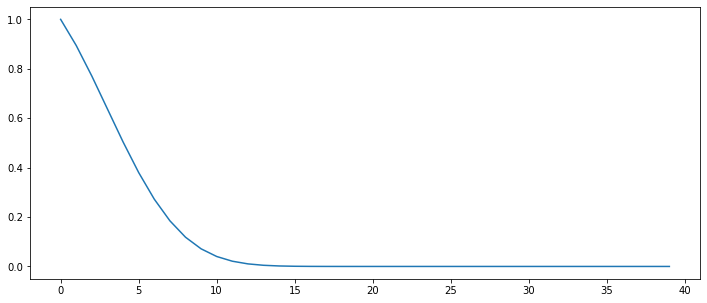

In [6]:
phi, dx, u, K, c, d = advection_diffusion(u=1., K=0.1, integration=0.05, dt=0.0028, Nx=40)
     
print('Dimensionless parameter c: {:.4f}'.format(c))
print('Dimensionless parameter d: {:.4f}'.format(d))

plt.figure(figsize=(12,5))
plt.plot(phi)
plt.show()

In [7]:
# Define the CFL criteria
CFL = 0.7
print("required dt (advection) <= {:.4f} s".format((CFL * dx)/u))
print("required dt (diffusion) <= {:.4f} s".format(((CFL * dx**2))/(2*K)))
print('')   

required dt (advection) <= 0.0175 s
required dt (diffusion) <= 0.0022 s



**Task 5**: Solve the Advection-Diffusion equation, with the following initial impulse signal and boundary conditions: 

\begin{align}
c(n,0) &=exp^{\left(-\left(\frac{(x-10)}{2}\right)^2\right)} \\
c(0,t) &=0 \\
c(L,t) &=\frac{\partial c}{\partial x}=0
\end{align}

Integrate the equation with K=0.1, u=1.0 over 0.05 s with a Δ𝑡=0.0028. Plot the results and the dimensionless time scales. Increase gradually Δ𝑡 and plot and analyse the results for different integration times.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline


def advection_diffusion(u, K, integration, dt, Nx):
    """ Simple advection-diffusion equation.
    
    integration :: Integration time in seconds
    Nx          :: Number of grid points
    dt          :: time step in seconds
    K           :: turbulent diffusivity
    u           :: Speed of fluid
    """
    
    # Definitions and assignments
    a   = 0.                # Left border
    b   = 1.                # Right border
    dx  = (b-a)/Nx          # Distance between grid points

    # Define the boundary conditions
    bc_l  = 0       # Left BC
    bc_r  = 0       # Right BC

    # Define index arrays 
    k   = np.arange(1,Nx-1)
    kr  = np.arange(2,Nx)
    kl  = np.arange(0,Nx-2)

    # Initial temperature field
    phi = np.exp(-((np.arange(Nx)-10)/2)**2)
                 
    # Set boundary condiiton
    phi[0] = bc_l

    # Dimensionless parameters
    d = (K*dt)/(dx**2)
    c = (u*dt)/dx

    # Time loop
    t = 0
  
    while t <= integration:
        # Set BC (Neumann condition)
        phi[-1] = phi[-2]
        
        # Dimensionless parameters
        c = np.divide(np.multiply(u, dt), dx)
        d = np.divide(np.multiply(K, dt), np.power(dx, 2))
        
        # Update flux
        phi[k] = (1 - 2*d)*phi[k] + (d - c/2)*phi[kr] + (d + c/2)*phi[kl]
        
        # compute
        CFL = 0.7
        max_dt_u = CFL * dx / u
        max_dt_K = (CFL * dx**2)/(2*K)
        dt = min(max_dt_u, max_dt_K)

        # Update time
        t = t + dt     
        
    return(phi, dx, u, K, c, d)





required dt (advection) <= 0.0075 s
required dt (diffusion) <= 0.0031 s

Courant number (c): 0.0875 (C<1)
Characteristic diffusion time (d): 0.3500


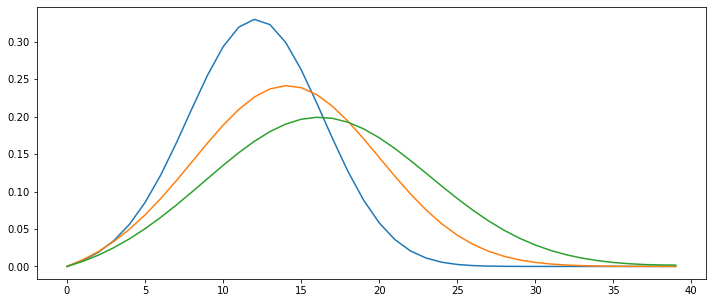

In [9]:
phi, dx, u, K, c, d = advection_diffusion(u=1.0, K=0.1, integration=0.05, dt=0.0028, Nx=40)
phi2, _, _, _, _, _ = advection_diffusion(u=1.0, K=0.1, integration=0.1, dt=0.0028, Nx=40)
phi3, _, _, _, _, _ = advection_diffusion(u=1.0, K=0.1, integration=0.15, dt=0.0028, Nx=40)

print("required dt (advection) <= {:.4f} s".format((0.3*dx)/u))
print("required dt (diffusion) <= {:.4f} s".format(((dx**2))/(2*K)))
print('')       
print('Courant number (c): {:.4f} (C<1)'.format(c))
print('Characteristic diffusion time (d): {:.4f}'.format(d))

plt.figure(figsize=(12,5))
plt.plot(phi)
plt.plot(phi2)
plt.plot(phi3)
plt.show()

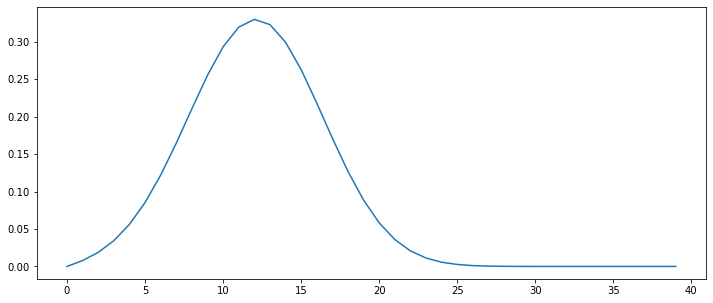

In [10]:
# Simulate evolution for different time steps
# Make plots
# ADD USER CODE HERE
plt.figure(figsize=(12,5))
plt.plot(phi)
plt.show()

**Task 6**: Starting with the heat equation above simplify the equation to model the temperature evolution in the boundary layer from the surface up to H=2 km height. Assume a fair-weather condition with a subsidence of -0.001 m s-1. Also assume horizontal homogeneity. Parameterize the heat flux using the eddy-diffusivity closure with K=0.25 m s-2. Solve the simplified equation using the following initial and boundary conditions:

\begin{align}
\theta(z,0)=290~K \\
\overline{w'\theta'}(z,0)=0~W~m^{−2} \\
\theta(0,t)=290+10 \cdot sin\left(\frac{2\pi \cdot t}{86400}\right)~K \\
\theta(H,t)=\frac{\partial \theta}{\partial z}=0.01~K~m^{-1}
\end{align}

- What happens when you increase the subsidence to -0.01 m s$^{-1}$? 
- Plot the kinematic heat flux.
- What is the maximum heat flux in W m$^{-2}$? Is this a realistic values for a fair-weather condition?
- Calculate the heat rate.

In [11]:
def boundary_layer(w, K, integration, dt, Nz, H):
    """ Simple advection-diffusion equation.
    
    x           :: 
    H           :: Height of the domain
    integration :: Integration time in seconds
    Nz          :: Number of grid points
    dt          :: time step in seconds
    K           :: turbulent diffusivity
    u           :: Speed of fluid
    """
    
    # Definitions and assignments
    a   = 0.                # Left border
    b   = H                 # Right border
    dz  = (b-a)/Nz          # Distance between grid points

    # Define the boundary conditions
    bc_t  = 0       # top BC
    bc_b  = 0       # bottom BC

    # Define index arrays 
    k   = np.arange(1,Nz-1)
    kr  = np.arange(2,Nz)
    kl  = np.arange(0,Nz-2)

    # Initial temperature field
    theta = 290 * np.ones(Nz)
    theta_all = np.zeros((Nz, int(integration/dt)))

    # Initial covariances
    cov = np.zeros(Nz)
    cov_all = np.zeros((Nz, int(integration/dt)))
    
    # Dimensionless parameters
    d = (K*dt)/(dz**2)
    c = (w*dt)/dz
    
    t = 0
    
    for idx in range(int(integration/dt)):
        
        # Set BC top
        theta[-1] = theta[-2] + 0.01 * dz
        
        # Set BC surface
        theta[0] = 290 + 10*np.sin((2 * np.pi * t)/86400)
        
        # Update flux
        theta[k] = (1 - 2*d)*theta[k] + (d - c/2)*theta[kr] + (d + c/2)*theta[kl]
        theta_all[:, idx] = theta[:]
        
        # Calculate and store the covariance
        cov[k] = -K * ((theta[kr]-theta[kl]) / (2*dz))
        cov_all[:, idx] = cov[:]
             
        # Increase time step
        t = t + dt
        
    return(theta_all, cov_all, np.arange(0, integration, dt), np.arange(0, Nz*dz, dz), u, K, c, d)



In [12]:
def make_plot(data, x, z, levels, title, unit, xlab, zlab, cmap='RdBu_r'):
    """ Useful function for plotting 2D-fields as contour plot"""
    
    # Create figure
    fig, ax = plt.subplots(1,1,figsize=(18,5));
    cn0 = ax.contourf(x,z,data,10,origin='lower',levels=levels,cmap=cmap);
    
    # Add the colorbar and set ticks and labels
    cbar= fig.colorbar(cn0, ax=ax, orientation='vertical')
    cbar.set_label(label=unit, size=16)
    cbar.ax.tick_params(labelsize=14)
    
    # Add labels and modify ticks
    ax.set_xlabel(xlab, fontsize=14)
    ax.set_ylabel(zlab, fontsize=14)
    ax.set_title(title)
    
    return ax


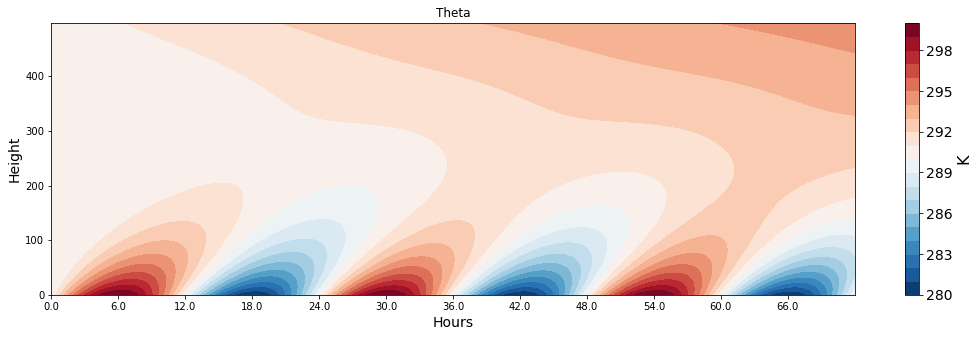

In [19]:
Nz = 200
H = 500
integration = 86400*3
dt = 1

phi1, cov, x, z, u, K, c, d = boundary_layer(w=-0.001, K=0.25, integration=integration, dt=dt, Nz=Nz, H=H)

# Create 2D mesh grid
ax = make_plot(phi1, x=x, z=z, levels=21, title='Theta', unit='K', xlab='Hours', zlab='Height', cmap='RdBu_r')

# Correct the ticks
ax.set_xticks(x[x%(3600*6)==0]);
ax.set_xticklabels(list(map(str,(x[x%(3600*6)==0]/3600))), size=10, weight='normal');

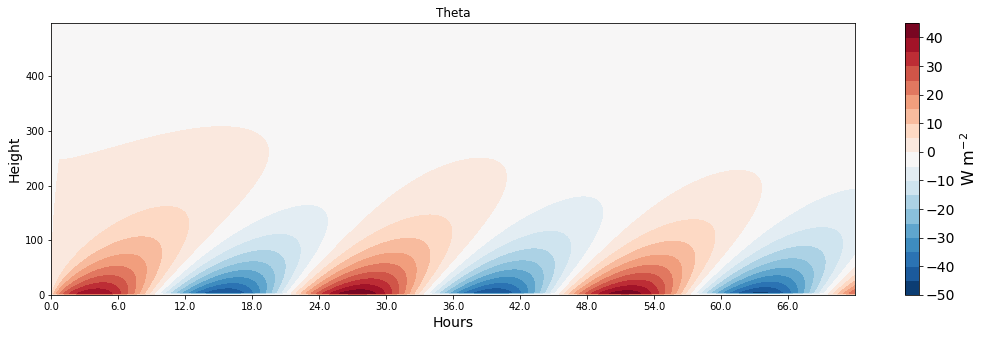

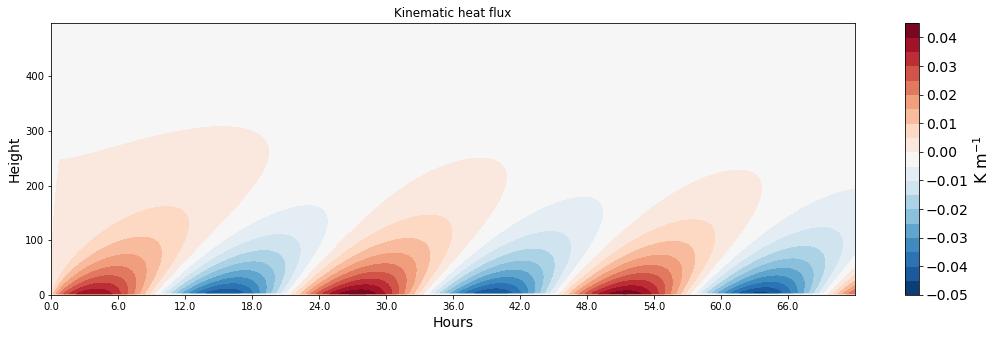

In [14]:
# Plot the heat fluxes

# Create 2D plot for the covariance
ax = make_plot(cov[:]*1004, x=x, z=z, levels=21, title='Theta', unit='W m$^{-2}$', xlab='Hours', zlab='Height', cmap='RdBu_r')
# Correct the ticks
ax.set_xticks(x[x%(3600*6)==0]);
ax.set_xticklabels(list(map(str,(x[x%(3600*6)==0]/3600))), size=10, weight='normal');

# Create 2D plot for the kinematic heat flux
ax = make_plot(cov[:], x=x, z=z, levels=21, title='Kinematic heat flux', unit='K m$^{-1}$', xlab='Hours', zlab='Height', cmap='RdBu_r')
# Correct the ticks
ax.set_xticks(x[x%(3600*6)==0]);
ax.set_xticklabels(list(map(str,(x[x%(3600*6)==0]/3600))), size=10, weight='normal');

Modelling lake effects - Lake Erie is so warm in relation to the air mass that it causes convection which produces massive snowfall o one side fo the lake

**Task 7**: Intense boundary layer convection may develop when cold air masses are advected over relatively warm surfaces. Develop a simple model for this by assuming that the time evolution of the boundary layer is determined by the vertical turbulent heat transport and the horizontal heat advection. Make the following assumptions: [Hint: use the eddy-diffusivity closure and the upwind scheme for the advection flux]

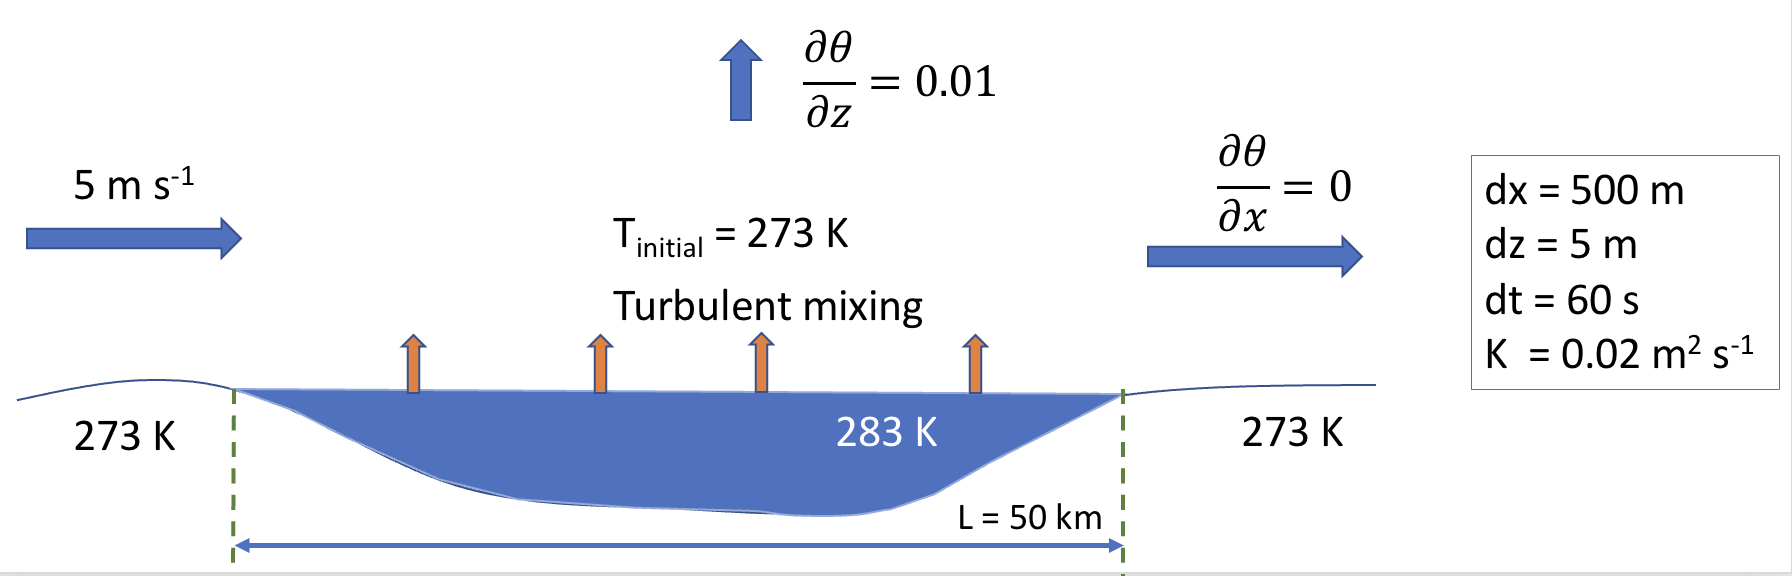

In [26]:
import random

def boundary_layer_evolution(u, K, dx, dz, Nx, Nz, hours, dt):
    """ Simple advection-diffusion equation.
    
    integration :: Integration time in seconds
    Nz          :: Number of grid points
    dt          :: time step in seconds
    K           :: turbulent diffusivity
    u           :: Speed of fluid
    """
       
    # Some definitions
    integration = hours*3600
    
    # Define index arrays 
    k   = np.arange(1,Nx-1)
    kr  = np.arange(2,Nx)
    kl  = np.arange(0,Nx-2)
    
    m   = np.arange(1,Nz-1)
    mu  = np.arange(2,Nz)
    md  = np.arange(0,Nz-2)
    

    # Initial temperature field
    theta = 268 * np.ones((Nz, Nx))
    cov =   np.zeros((Nz, Nx))
    adv =   np.zeros((Nz, Nx))
    
    # Define the boundary conditions
    # Set BC surface
    theta[0, :] = 268
    
    # Initialize lake boudary
    lake_from = 50
    lake_to = 150
    theta[0, lake_from:lake_to] = 278
    
    # Dimensionless parameters
    c = (u*dt)/dx
    d = (K*dt)/(dz**2)

    for idx in range(int(integration/dt)):

        # Set BC top - neumann condition
        theta[-1, :] = theta[-2, :] + 0.01 * dz
        
        # Set BC right
        theta[:, -1] = theta[:, -2]
        
        # Keep track of old temperature data
        old = theta
            
        # First update grid cells in x direction (loop over all z values)
        for x in range(1,Nx-1):
            theta[m, x] = theta[m,x] + ((K*dt)/(dz**2))  * (old[mu, x] + old[md, x]- 2*old[m,x])

        # Then update grid cells in z direction (loop over all x values)
        for z in range(1,Nz-1):
            theta[z, k] = theta[z,k] - (u*dt/dx) * (old[z, k] + old[z, kl])

        
    return theta, cov, adv, c, d, np.arange(0, Nx*dx, dx), np.arange(0, Nz*dz, dz)

In [29]:
import random

def boundary_layer_evolution(u, K, dx, dz, Nx, Nz, hours, dt):
    """ Simple advection-diffusion equation.
    
    integration :: Integration time in seconds
    Nz          :: Number of grid points
    dt          :: time step in seconds
    K           :: turbulent diffusivity
    u           :: Speed of fluid
    """
       
    # Some definitions
    # Multiply the hours given by the user by 3600 s to 
    # get the integration time in seconds
    integration = hours*3600
    
    # Define index arrays 
    # Since this a 2D problem we need to define two index arrays.
    # The first set of index arrays is used for indexing in x-direction. This
    # is needed to calculate the derivatives in x-direction (advection)
    k   = np.arange(1,Nx-1) # center cell
    kr  = np.arange(2,Nx)   # cells to the right
    kl  = np.arange(0,Nx-2) # cells to the left
    
    # The second set of index arrays is used for indexing in z-direction. This
    # is needed to calculate the derivates in z-direction (turbulent diffusion)
    m   = np.arange(1,Nz-1) # center cell
    mu  = np.arange(2,Nz)   # cells above 
    md  = np.arange(0,Nz-2) # cells below

    # Initial temperature field
    theta = 268 * np.ones((Nz, Nx)) # Temperature field is initialized with 268 K
    cov = np.zeros((Nz, Nx))        # Empty array for the covariances
    adv = np.zeros((Nz, Nx))        # Empty array for the advection term 
    
    # Define the boundary conditions
    # Set BC surface
    theta[0, :] = 268
    
    # The lower temperature boundary needs to be updated where there is the lake
    # Here, were set the temperature at the lower boundary from the grid cell 50
    # to 150 to a temperature of 278 K
    lake_from = 50
    lake_to = 150
    theta[0, lake_from:lake_to] = 278
    
    # Dimensionless parameters
    c = (u*dt)/dx
    d = (K*dt)/(dz**2)

    # Integrate the model
    for idx in range(int(integration/dt)):

        # Set BC top (Neumann condition)
        # The last term accounts for the fixed gradient of 0.01
        theta[Nz-1, :] = theta[Nz-2, :] + 0.01 * dz
        
        # Set BC right (Dirichlet condition)
        theta[:, Nx-1] = theta[:, Nx-2]
        
        # We need to keep track of the old values for calculating the new derivatives.
        # That means, the temperature value a grid cell is calculated from its values 
        # plus the correction term calculated from the old values. This guarantees that
        # the gradients for the x an z direction are based on the same old values.
        old = theta
            
        # First update grid cells in z-direction. Here, we loop over all x grid cells and
        # use the index arrays m, mu, md to calculate the gradients for the
        # turbulent diffusion (which only depends on z)
        for x in range(1,Nx-1):
            # temperature - turbulent diffusion
            theta[m,x] = theta[m,x] + ((K*dt)/(dz**2))*(old[mu,x]+old[md,x]-2*old[m,x])
            # Calculate the warming rate [K/s] by covariance
            cov[m,x] = ((K)/(dz**2))*(old[mu,x]+old[md,x]-2*old[m,x])

        # Then update grid cells in x-direction. Here, we loop over all z grid cells and
        # use the index arrays k, kl, kr to calculate the gradients for the
        # advection (which only depends on x)
        for z in range(1,Nz-1):
            # temperature advection
            theta[z,k] = theta[z,k] - ((u*dt)/(dx))*(old[z,k]-old[z,kl])
            # Calculate the warming rate [K/s] by the horizontal advection 
            # Note: Here, we use a so-called upwind-scheme (backward discretization)
            adv[z,k] = - (u/dx)*(old[z,k]-old[z,kl])

    # Return results    
    return theta, cov, adv, c, d, np.arange(0, Nx*dx, dx), np.arange(0, Nz*dz, dz)

In [37]:
theta, cov, adv, c, d, x, z = boundary_layer_evolution(u=5, K=0.02, dx=500, dz=5, Nx=250, Nz=20, hours=20, dt=75)

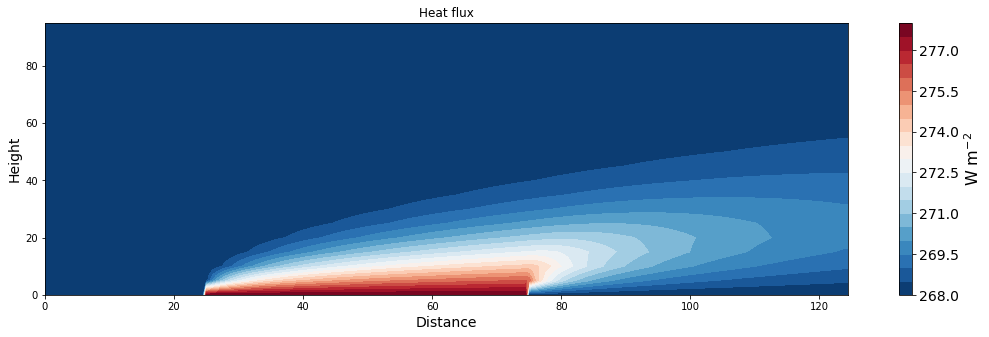

In [38]:
# Create 2D plot for the covariance
ax = make_plot(theta, x=x/1000, z=z, levels=21, title='Heat flux', unit='W m$^{-2}$', 
               xlab='Distance', zlab='Height', cmap='RdBu_r')

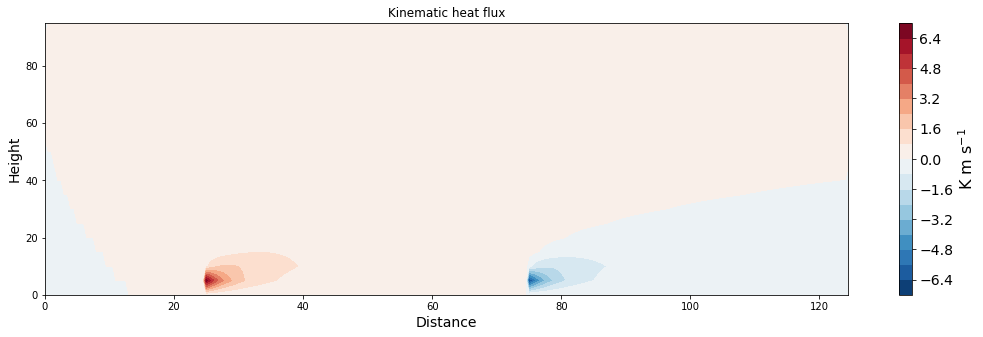

In [39]:
# Create 2D plot for the covariance
ax = make_plot(cov*1004, x=x/1000, z=z, levels=21, title='Kinematic heat flux', unit='K m s$^{-1}$', 
               xlab='Distance', zlab='Height', cmap='RdBu_r')

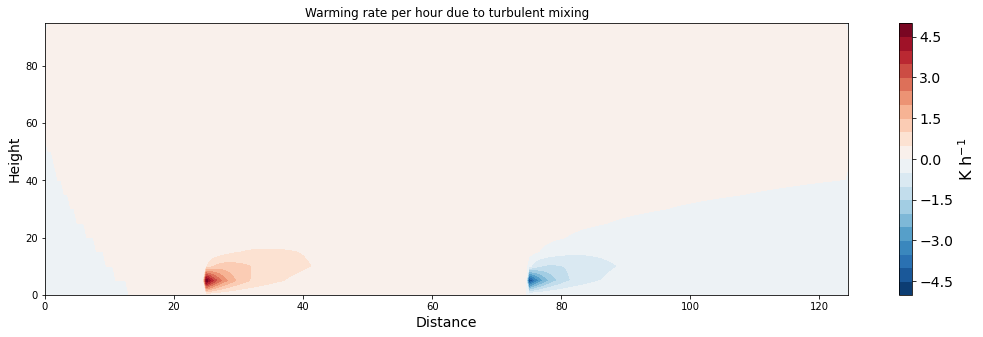

In [40]:
# Create 2D plot for the covariance
ax = make_plot((cov[:,:]/5)*3600, x=x/1000, z=z, levels=21, title='Warming rate per hour due to turbulent mixing', 
               unit='K h$^{-1}$', 
               xlab='Distance', zlab='Height', cmap='RdBu_r')

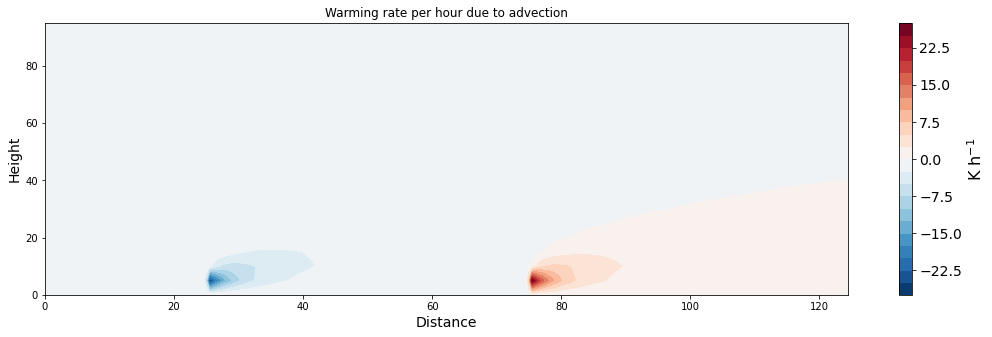

In [41]:
# Create 2D plot for the covariance
ax = make_plot(adv*3600, x=x/1000, z=z, levels=21, title='Warming rate per hour due to advection', 
               unit='K h$^{-1}$', 
               xlab='Distance', zlab='Height', cmap='RdBu_r')